In [1]:
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

plt.style.use('deeplearning.mplstyle')


In [2]:
data = load_mnist_data('./data/train-images.idx3-ubyte', './data/train-labels.idx1-ubyte')
# Splitting the data into features and labels
x = data.iloc[:, :-10].values
x = x.reshape(-1, 28, 28, 1)
y = data.iloc[:, -10:].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(y_train[90])

Data after loading:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
Data after normalization:
     0    1    2    3    4    5    6    7    8    9  ...  digit_0  digit_1  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        1        0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

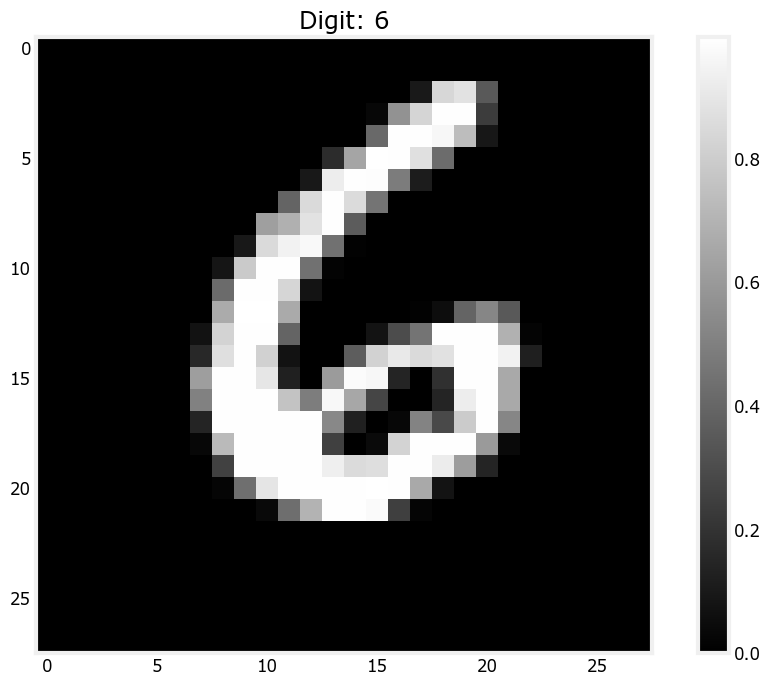

In [3]:
# Visualizing the data
plt.imshow(x[90].reshape(28, 28), cmap='gray')
plt.title(f'Digit: {np.argmax(y[90])}')
plt.colorbar()
plt.show()

In [ ]:
models = build_cnn()

nn_accuracy_scores = np.zeros((3, 2))
i = 0
threshold = 0.7
for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(from_logits=True))
    print(f'Training {model.name}')

    model.fit(X_train, y_train, epochs=150, verbose=0)

    print(f'{model.name} Trained')

    yhat = model.predict(X_train)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.argmax(yhat)
    y_final = np.argmax(y_train)
    nn_accuracy_scores[i, 0] = accuracy_score(y_final, yhat)

    yhat_cv = model.predict(X_test)
    yhat_cv = tf.math.sigmoid(yhat_cv)
    yhat_cv = np.argmax(yhat_cv)
    y_final_cv = np.argmax(y_test)
    nn_accuracy_scores[i, 1] = accuracy_score(y_final_cv, yhat_cv)

    i += 1

for j in range(3):
    print(f'The Accuracy for {models[j].name}: {nn_accuracy_scores[j]}')

Training CNN1
